# Simple Linear Regression

### Definition

**Simple linear regression** is a method used to model the relationship between a single independent variable (input) and a dependent variable (output) by fitting a linear equation to the observed data.

- regression: to predict continuous outcomes (e.g.: temperature, prices of houses, age..)
- classification: to predict categories

### Formula:

$y = \beta_0 + \beta_1x + \epsilon$

Here's what each element in the formula represents:

- `y`: This is the dependent variable, target variable, or the output that we're trying to predict.

- `β0`: This is the constant or intercept of the regression line with the y-axis. It represents the predicted value of \( y \) when the independent variable \( x \) is zero. In other words, it's the starting point of the line in the y-axis.

- `β1`:  This is the slope of the regression line. It represents the change in the predicted \( y \) value for a one-unit change in the independent variable \( x \). If β$_1$ is positive, it indicates that as \( x \) increases, \( y \) also increases; if β$_1$ is negative, it indicates that as \( x \) increases, \( y \) decreases.

- `x`: This is the independent variable, predictor or input feature that we're using to predict \( y \). It's the variable we think has an effect on our dependent variable.

- `𝟄`: This is the error term, also known as the residual. It represents the difference between the observed values and the values predicted by the linear model. It captures all other factors that influence \( y \) but are not included in the model.

The goal of simple linear regression is to find the best-fitting line through our data points that minimizes the errors `𝟄` of prediction. When we plot this relationship, `β0` determines where the line starts vertically, and `β1` determines its angle or slope.


### Example

Imagine we want to predict a person's weight based on their height. Our dependent variable \( y \) would be the person's weight, and our independent variable \( x \) would be the person's height.

- `β0` (the intercept) might tell us the average weight of a person when the height is zero (which is not realistic in this context but is part of the model).

- `β1` (the slope) would tell us how much we expect the weight to change for each additional unit of height. For example, if `β1` is 0.5, we expect the weight to increase by 0.5 units for every unit increase in height.

- `𝟄` is there because the model isn't perfect, and there will be differences between the actual weight and the weight predicted by the model based on height alone. This could be due to other factors like diet, age, or genetics, which are not included in the model.

### Calculation

The equation is calculated using a method called **Ordinary Least Squares** (OLS), where the goal is to find the line (or hyperplane) that minimizes the sum of the squares of the vertical distances (residuals) between the observed values and the line. These vertical distances are the errors between the actual values and the values predicted by the line:

1) The formula for the slope \( β1 \) can be expressed as below, where ( $\overline{x}$ ) and \( ȳ \) are the mean values of the x and y series, respectively:
  
  $\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2}$

2) Once \( β1 \) is calculated, the intercept \( β0 \) can be calculated as:
  
  $\beta_0 = \overline{y} - \beta_1\overline{x}$

3) After finding \( β0 \) and \( β1 \), the regression line can be plotted as:
  
  $y = \beta_0 + \beta_1x$

### Importing dataset

In [53]:
import pandas as pd
dataset = pd.read_csv('./filez/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Splitting Test/Train set

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Simple Linear Regression model on Training set

In [55]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [56]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

### Visualising the Training set results

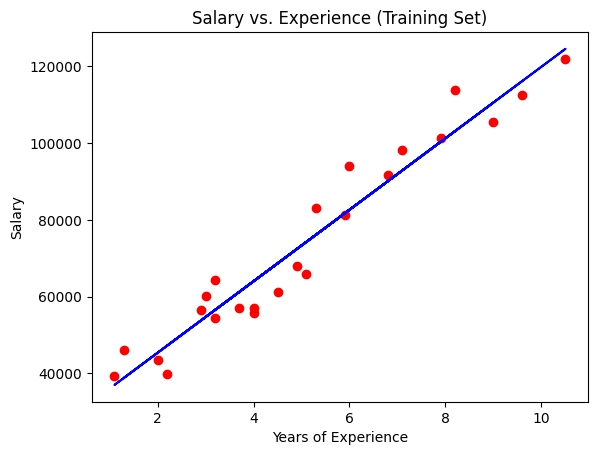

In [57]:
import matplotlib.pyplot as plt

# show TRAIN data points
plt.scatter(x=X_train, y=y_train, color="red")
 # show regression line from TRAIN data
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs. Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Visualising the Test set results

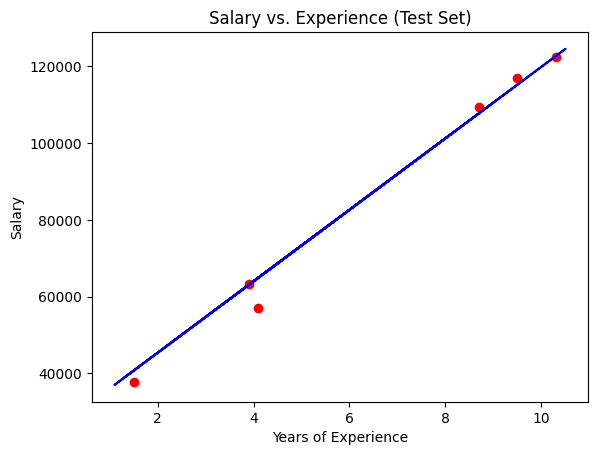

In [58]:
import matplotlib.pyplot as plt

# show TEST data points
plt.scatter(x=X_test, y=y_test, color="red")
 # show regression line from TRAIN data (NOT with test)
 # we want to see the regression line over real (test) data
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs. Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

-> There's a linear correlation within the dataset, so test data matches pretty good with the linear regression.

### Making a new prediction
The "predict" method expects a 2D array as the format of its inputs, therefore:

- 12 → scalar 

- [12] → 1D array 

- [[12]] → 2D array

In [59]:
# predict average salary with 12-year experience
regressor.predict([[12]])

array([138531.00067138])

### Getting the linear regression equation with coefficients

In [60]:
print(f'intercept (B0):   {regressor.intercept_:,.2f}')
print(f'coefficient (B1): {regressor.coef_[0]:,.2f}')


intercept (B0):   26,780.10
coefficient (B1): 9,312.58


Linear Regression formula:

$y = \beta_0 + \beta_1x + \epsilon$

In our context:

$Salary = 26,816.19 + 9,345.94 × YearsExperience$

**Remarks**:
- The intercept and the coefficient are parameters that we estimate from our data. They represent the best fit line that minimizes the sum of the squared residuals.

- However, ϵ is not a fixed value we calculate once; it varies for each prediction. It's the difference between each observed salary and the salary predicted by our regression line based on YearsExperience. When we create a prediction using your model, we don't add a specific 
ϵ because it's the unknown error for future predictions.